In [7]:
#import tools as tl
import lab1.bit_array_tools as bat
import lab1.channel as channel
import lab1.generic_coder as gc
import lab2.cyclic_coder as cc
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import time

In [30]:
def plot_graphs(coders_dict, num_of_info_words=1000, dir_name=None, fig_name=None):
    limit = 1e-6
    i = 0.5
    sticks = []
    while i > 0.001:
        sticks.append(i)
        i /= 2
    vp = np.logspace(math.log(0.5, 2), math.log(limit, 2), 30, base=2)
    ini = time.time()
    print("Initiate process:")
    data_dict = dict()
    for coder_name in coders_dict:
        data_dict[coder_name] = {'p':list(), 'pb':list()}
    for p in vp:
        for coder_name in coders_dict:
            coder = coders_dict[coder_name]['coder']
            p_vector = data_dict[coder_name]['p']
            pb  = data_dict[coder_name]['pb']
            ini_cycle = time.time()
            p_vector.append(p)
            information_word_length = coder.information_word_length
            # The magic happens here:
            information_words_array = bat.generate_information_words(num_of_info_words, information_word_length)
            codewords_array = coder.encode(information_words_array)
            transmitted_words = channel.binary_symmetric_channel(codewords_array, p)
            decoded_words = coder.decode(transmitted_words)
            pb.append(bat.compare_arrays(information_words_array, decoded_words))
        print("p = {:<10.6} (T:{:<5.4} s)".format(p, time.time() - ini_cycle))
    print("Completed in {:.4}s".format(time.time() - ini))
    x = np.linspace(0.5, 0, 100)
    fig, ax = plt.subplots(figsize=(16,10), dpi=80)
    for coder_name, data in data_dict.items():
        color = coders_dict[coder_name].get('color')
        linewidth = coders_dict[coder_name].get('linewidth')
        linestyle = coders_dict[coder_name].get('linestyle')
        ax.plot(data['p'], data['pb'], label=coders_dict[coder_name].get('label', coder_name), color=color, linewidth=linewidth, linestyle=linestyle)
    ax.set_yscale('log', base=2)
    ax.set_xscale('log', base=2)
    ax.set_xlim(0.5, pow(10, -3))
    ax.set_ylim(pow(10, -3), 0.5)
    plt.xticks(sticks, sticks)
    plt.yticks(sticks, sticks)

    ax.get_yaxis().set_major_formatter(
        matplotlib.ticker.FuncFormatter(lambda x, p: '{0:.2g}'.format(float(x), ',')))
    ax.get_xaxis().set_major_formatter(
        matplotlib.ticker.FuncFormatter(lambda x, p: '{0:.2g}'.format(float(x), ',')))

    plt.xlabel('p')
    plt.ylabel('Pb')
    ax.legend()
    if dir_name is None: dir_name = './'
    if fig_name is None: fig_name = 'code_' + str(num_of_info_words)
    plt.savefig(dir_name + fig_name, facecolor='white')
    plt.show()

# Create the coders

In [31]:
none_encode_matrix = np.array([[1, 0, 0, 0],  # b1
                               [0, 1, 0, 0],  # b2
                               [0, 0, 1, 0],  # b3
                               [0, 0, 0, 1]]) # b4
                               #b1 b2 b3 b4
    
hamming_encode_matrix = np.array([[1, 0, 0, 0, 1, 1, 1],  # b1
                                  [0, 1, 0, 0, 1, 0, 1],  # b2
                                  [0, 0, 1, 0, 1, 1, 0],  # b3
                                  [0, 0, 0, 1, 0, 1, 1]]) # b4
                                  # b1 b2 b3 b4 p1 p2 p3
    
our_encode_matrix = np.array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],  # b1
                              [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0],  # b2
                              [0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],  # b3
                              [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],  # b4
                              [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1],  # b5
                              [0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1],  # b6  
                              [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1],  # b7
                              [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0]]) # b8
                             # b1 b2 b3 b4 b5 b6 b7 b8 p1 p2 p3 p4 p5 p6

none_coder = gc.GenericParityBitBlockCoder(none_encode_matrix)
hamming_coder = gc.GenericParityBitBlockCoder(hamming_encode_matrix)
our_coder = gc.GenericParityBitBlockCoder(our_encode_matrix)
    
#Cyclic codes:

# Hamming-code - N = 7, k = 4
generator_polynomial_hamming_code = [1, 1, 0, 1]
hamming_code_N = 7
cyclic_hamming_coder = cc.CyclicBitBlockCoder(generator_polynomial_hamming_code, hamming_code_N)

##Codes that correct at most 1 bit:
# C1 - N = 11, k = 6
generator_polynomial_c1 = [1, 0, 1, 1, 1, 1]
c1_N = 11
cyclic_c1_1b_coder = cc.CyclicBitBlockCoder(generator_polynomial_c1, c1_N)

# C2 - N = 12, k = 7
generator_polynomial_c2 = [1, 0, 1, 1, 0, 1]
c2_N = 11
cyclic_c2_1b_coder = cc.CyclicBitBlockCoder(generator_polynomial_c2, c2_N)

# C3 - N = 14, k = 8
generator_polynomial_c3 = [1, 0, 0, 0, 1, 0, 1]
c3_N = 14
cyclic_c3_1b_coder = cc.CyclicBitBlockCoder(generator_polynomial_c3, c3_N)

# C4 - N = 15, k = 9
generator_polynomial_c4 = [1, 1, 1, 1, 0, 0, 1]
c4_N = 15
cyclic_c4_1b_coder = cc.CyclicBitBlockCoder(generator_polynomial_c4, c4_N)

# C5 - N = 18, k = 10
generator_polynomial_c5 = [1, 0, 1, 1, 0, 1, 1, 0, 1]
c5_N = 18
cyclic_c5_1b_coder = cc.CyclicBitBlockCoder(generator_polynomial_c5, c5_N)

# LAB 1

## Hamming Code

Initiate process:
p = 0.5        (T:0.3337 s)
p = 0.31802    (T:0.2943 s)
p = 0.202273   (T:0.2939 s)
p = 0.128653   (T:0.2489 s)
p = 0.0818286  (T:0.2771 s)
p = 0.0520462  (T:0.3047 s)
p = 0.0331034  (T:0.2471 s)
p = 0.0210551  (T:0.2608 s)
p = 0.0133918  (T:0.2737 s)
p = 0.00851774 (T:0.2663 s)
p = 0.00541761 (T:0.2825 s)
p = 0.00344581 (T:0.2558 s)
p = 0.00219167 (T:0.2341 s)
p = 0.00139399 (T:0.2695 s)
p = 0.000886631 (T:0.253 s)
p = 0.000563932 (T:0.2561 s)
p = 0.000358683 (T:0.2186 s)
p = 0.000228136 (T:0.2401 s)
p = 0.000145104 (T:0.2303 s)
p = 9.22916e-05 (T:0.2467 s)
p = 5.8701e-05 (T:0.239 s)
p = 3.73362e-05 (T:0.249 s)
p = 2.37473e-05 (T:0.2485 s)
p = 1.51042e-05 (T:0.2412 s)
p = 9.60685e-06 (T:0.2424 s)
p = 6.11033e-06 (T:0.2281 s)
p = 3.88641e-06 (T:0.2566 s)
p = 2.47191e-06 (T:0.2188 s)
p = 1.57223e-06 (T:0.2262 s)
p = 1e-06      (T:0.2868 s)
Completed in 7.724s


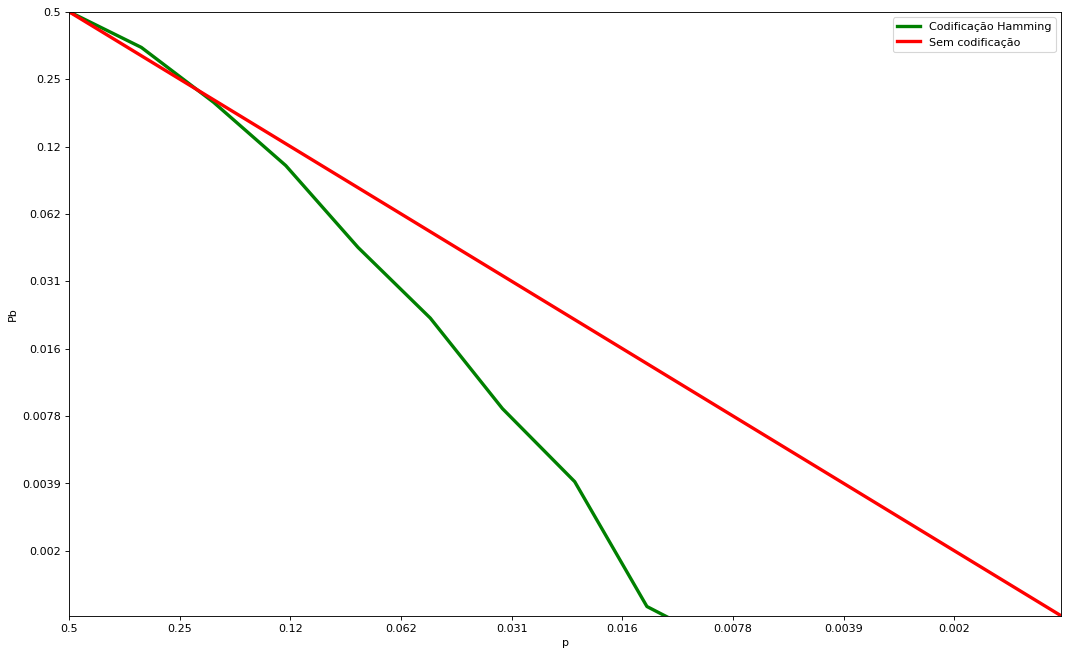

In [5]:
pb = []
p_vector = []
limit = 1e-6
i = 0.5
sticks = []
while i > 0.001:
    sticks.append(i)
    i /= 2
vp = np.logspace(math.log(0.5, 2), math.log(limit, 2), 30, base=2)
ini = time.time()
print("Initiate process:")
for p in vp:
    ini_cycle = time.time()
    p_vector.append(p)
    number_information_words = 10000
    information_word_length = 4
    # The magic happens here:
    information_words_array = bat.generate_information_words(number_information_words, information_word_length)
    codewords_array = hamming_coder.encode(information_words_array)
    transmitted_words = channel.binary_symmetric_channel(codewords_array, p)
    decoded_words = hamming_coder.decode(transmitted_words)
    pb.append(bat.compare_arrays(information_words_array, decoded_words))
    print("p = {:<10.6} (T:{:<5.4} s)".format(p, time.time() - ini_cycle))
print("Completed in {:.4}s".format(time.time() - ini))

x = np.linspace(0.5, 0, 100)
fig, ax = plt.subplots(figsize=(16,10), dpi=80)
ax.plot(p_vector, pb, label='Codificação Hamming', color='g', linewidth=3)
plt.plot(x, x, label='Sem codificação', color='r', linewidth=3)
ax.set_yscale('log', base=2)
ax.set_xscale('log', base=2)
ax.set_xlim(0.5, pow(10, -3))
ax.set_ylim(pow(10, -3), 0.5)
plt.xticks(sticks, sticks)
plt.yticks(sticks, sticks)

ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: '{0:.2g}'.format(float(x), ',')))
ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: '{0:.2g}'.format(float(x), ',')))

plt.xlabel('p')
plt.ylabel('Pb')
ax.legend()
plt.savefig('./lab1/plots/hamming_fig_sz_{}_lim_{}.png'.format(number_information_words, limit), facecolor='white')
plt.show()

## Hamming Code With Our Code

Initiate process:
p = 0.5        (T:0.2256 s)
p = 0.31802    (T:0.266 s)
p = 0.202273   (T:0.2152 s)
p = 0.128653   (T:0.2666 s)
p = 0.0818286  (T:0.1814 s)
p = 0.0520462  (T:0.2032 s)
p = 0.0331034  (T:0.2004 s)
p = 0.0210551  (T:0.2039 s)
p = 0.0133918  (T:0.2006 s)
p = 0.00851774 (T:0.1994 s)
p = 0.00541761 (T:0.1851 s)
p = 0.00344581 (T:0.2031 s)
p = 0.00219167 (T:0.2036 s)
p = 0.00139399 (T:0.2031 s)
p = 0.000886631 (T:0.2072 s)
p = 0.000563932 (T:0.1907 s)
p = 0.000358683 (T:0.2047 s)
p = 0.000228136 (T:0.1883 s)
p = 0.000145104 (T:0.2036 s)
p = 9.22916e-05 (T:0.1874 s)
p = 5.8701e-05 (T:0.1893 s)
p = 3.73362e-05 (T:0.2049 s)
p = 2.37473e-05 (T:0.2192 s)
p = 1.51042e-05 (T:0.1953 s)
p = 9.60685e-06 (T:0.1926 s)
p = 6.11033e-06 (T:0.2053 s)
p = 3.88641e-06 (T:0.1931 s)
p = 2.47191e-06 (T:0.1959 s)
p = 1.57223e-06 (T:0.2027 s)
p = 1e-06      (T:0.1959 s)
Completed in 25.32s


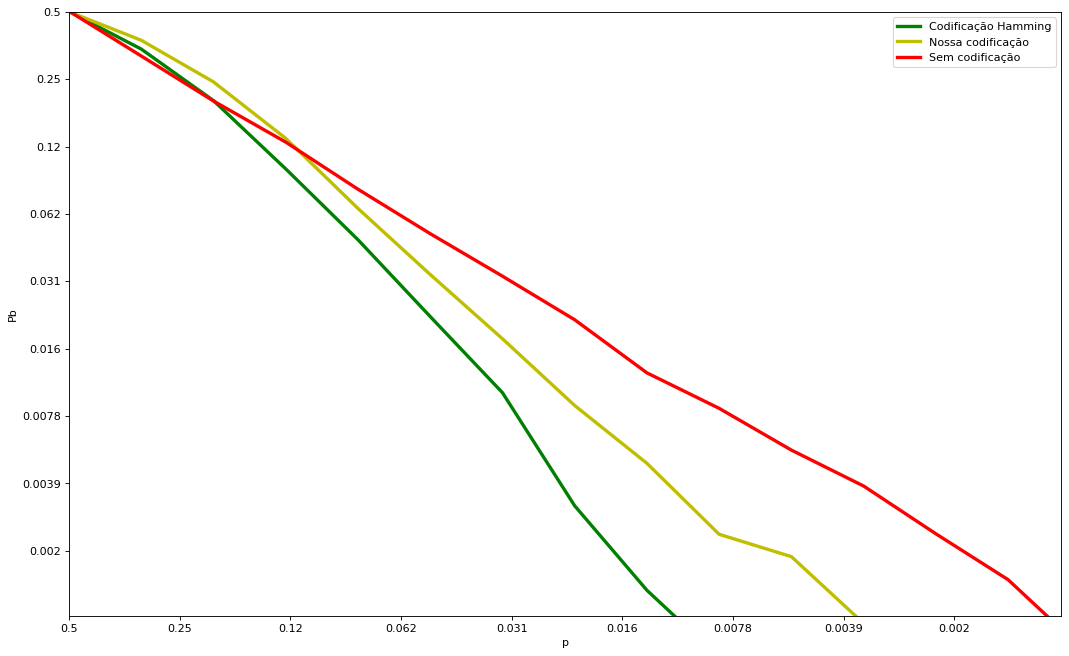

In [5]:
pb_hamming_code_vector = []
pb_our_code_vector     = []
pb_none_code_vector    = []
p_hamming_code_vector = []
p_our_code_vector     = []
p_none_code_vector    = []
limit = 1e-6
i = 0.5
sticks = []
while i > 0.001:
    sticks.append(i)
    i /= 2
vp = np.logspace(math.log(0.5, 2), math.log(limit, 2), 30, base=2)
ini = time.time()
print("Initiate process:")
hamming_code_pack = (p_hamming_code_vector, pb_hamming_code_vector, hamming_coder)
our_code_pack     = (p_our_code_vector, pb_our_code_vector, our_coder)
none_code_pack    = (p_none_code_vector, pb_none_code_vector, none_coder)
for p in vp:
    for p_vector, pb, coder in [hamming_code_pack, our_code_pack, none_code_pack]:
        ini_cycle = time.time()
        p_vector.append(p)
        number_information_words = 10000
        information_word_length = coder.information_word_length
        # The magic happens here:
        information_words_array = bat.generate_information_words(number_information_words, information_word_length)
        codewords_array = coder.encode(information_words_array)
        transmitted_words = channel.binary_symmetric_channel(codewords_array, p)
        decoded_words = coder.decode(transmitted_words)
        pb.append(bat.compare_arrays(information_words_array, decoded_words))
    print("p = {:<10.6} (T:{:<5.4} s)".format(p, time.time() - ini_cycle))
print("Completed in {:.4}s".format(time.time() - ini))

x = np.linspace(0.5, 0, 100)
fig, ax = plt.subplots(figsize=(16,10), dpi=80)
ax.plot(p_hamming_code_vector, pb_hamming_code_vector, label='Codificação Hamming', color='g', linewidth=3)
ax.plot(p_our_code_vector, pb_our_code_vector, label='Nossa codificação', color='y', linewidth=3)
ax.plot(p_none_code_vector, pb_none_code_vector, label='Sem codificação', color='r', linewidth=3)
ax.set_yscale('log', base=2)
ax.set_xscale('log', base=2)
ax.set_xlim(0.5, pow(10, -3))
ax.set_ylim(pow(10, -3), 0.5)
plt.xticks(sticks, sticks)
plt.yticks(sticks, sticks)

ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: '{0:.2g}'.format(float(x), ',')))
ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: '{0:.2g}'.format(float(x), ',')))

plt.xlabel('p')
plt.ylabel('Pb')
ax.legend()
plt.savefig('./lab1/plots/hamming_fig_sz_{}_lim_{}.png'.format(number_information_words, limit), facecolor='white')
plt.show()

# LAB 2

Initiate process:
p = 0.5        (T:5.238 s)
p = 0.31802    (T:5.444 s)
p = 0.202273   (T:5.443 s)
p = 0.128653   (T:5.343 s)
p = 0.0818286  (T:5.408 s)
p = 0.0520462  (T:5.395 s)
p = 0.0331034  (T:5.153 s)
p = 0.0210551  (T:5.431 s)
p = 0.0133918  (T:5.267 s)
p = 0.00851774 (T:5.487 s)
p = 0.00541761 (T:5.349 s)
p = 0.00344581 (T:5.287 s)
p = 0.00219167 (T:5.23  s)
p = 0.00139399 (T:5.293 s)
p = 0.000886631 (T:5.298 s)
p = 0.000563932 (T:5.403 s)
p = 0.000358683 (T:5.264 s)
p = 0.000228136 (T:5.287 s)
p = 0.000145104 (T:5.403 s)
p = 9.22916e-05 (T:5.537 s)
p = 5.8701e-05 (T:5.485 s)
p = 3.73362e-05 (T:5.3   s)
p = 2.37473e-05 (T:5.498 s)
p = 1.51042e-05 (T:5.369 s)
p = 9.60685e-06 (T:5.346 s)
p = 6.11033e-06 (T:5.253 s)
p = 3.88641e-06 (T:5.305 s)
p = 2.47191e-06 (T:5.287 s)
p = 1.57223e-06 (T:5.324 s)
p = 1e-06      (T:5.333 s)
Completed in 186.6s


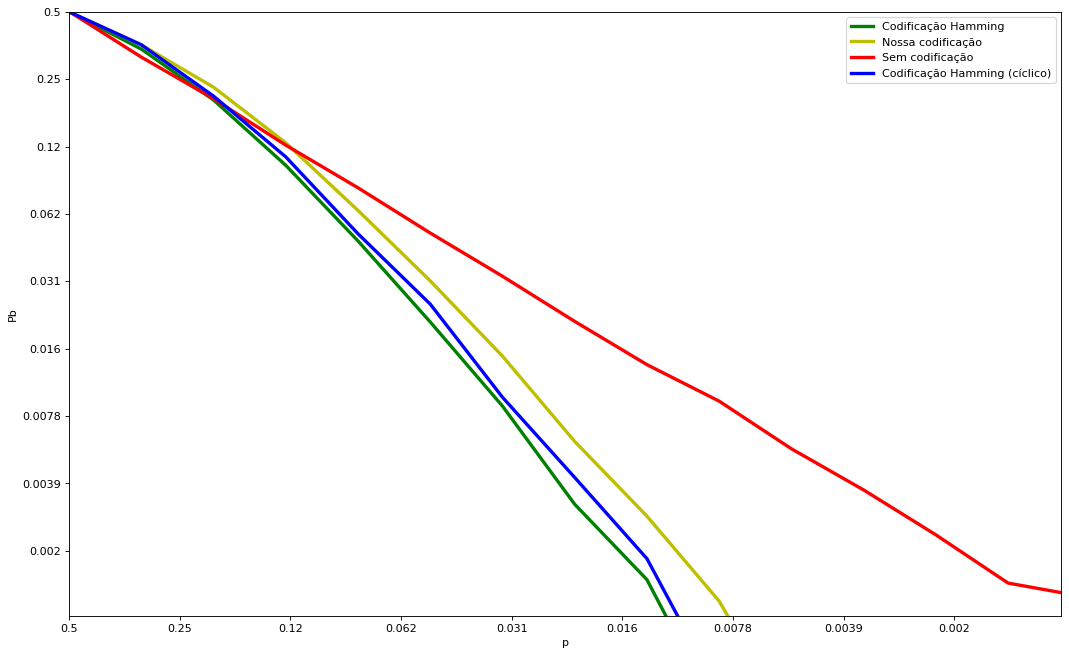

In [6]:
pb_hamming_code_vector = []
pb_our_code_vector     = []
pb_none_code_vector    = []
pb_cyclic_hamming_code_vector = []
p_hamming_code_vector = []
p_our_code_vector     = []
p_none_code_vector    = []
p_cyclic_hamming_code_vector = []
limit = 1e-6
i = 0.5
sticks = []
while i > 0.001:
    sticks.append(i)
    i /= 2
vp = np.logspace(math.log(0.5, 2), math.log(limit, 2), 30, base=2)
ini = time.time()
print("Initiate process:")
hamming_code_pack = (p_hamming_code_vector, pb_hamming_code_vector, hamming_coder)
our_code_pack     = (p_our_code_vector, pb_our_code_vector, our_coder)
none_code_pack    = (p_none_code_vector, pb_none_code_vector, none_coder)
cyclic_hamming_code_pack = (p_cyclic_hamming_code_vector, pb_cyclic_hamming_code_vector, cyclic_hamming_coder)
for p in vp:
    for p_vector, pb, coder in [hamming_code_pack, our_code_pack, none_code_pack, cyclic_hamming_code_pack]:
        ini_cycle = time.time()
        p_vector.append(p)
        number_information_words = 10000
        information_word_length = coder.information_word_length
        # The magic happens here:
        information_words_array = bat.generate_information_words(number_information_words, information_word_length)
        codewords_array = coder.encode(information_words_array)
        transmitted_words = channel.binary_symmetric_channel(codewords_array, p)
        decoded_words = coder.decode(transmitted_words)
        pb.append(bat.compare_arrays(information_words_array, decoded_words))
    print("p = {:<10.6} (T:{:<5.4} s)".format(p, time.time() - ini_cycle))
print("Completed in {:.4}s".format(time.time() - ini))

x = np.linspace(0.5, 0, 100)
fig, ax = plt.subplots(figsize=(16,10), dpi=80)
ax.plot(p_hamming_code_vector, pb_hamming_code_vector, label='Codificação Hamming', color='g', linewidth=3)
ax.plot(p_our_code_vector, pb_our_code_vector, label='Nossa codificação', color='y', linewidth=3)
ax.plot(p_none_code_vector, pb_none_code_vector, label='Sem codificação', color='r', linewidth=3)
ax.plot(p_cyclic_hamming_code_vector, pb_cyclic_hamming_code_vector, label='Codificação Hamming (cíclico)', color='b', linewidth=3)
ax.set_yscale('log', base=2)
ax.set_xscale('log', base=2)
ax.set_xlim(0.5, pow(10, -3))
ax.set_ylim(pow(10, -3), 0.5)
plt.xticks(sticks, sticks)
plt.yticks(sticks, sticks)

ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: '{0:.2g}'.format(float(x), ',')))
ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: '{0:.2g}'.format(float(x), ',')))

plt.xlabel('p')
plt.ylabel('Pb')
ax.legend()
plt.savefig('./lab2/plots/hamming_fig_sz_{}_lim_{}.png'.format(number_information_words, limit), facecolor='white')
plt.show()

In [ ]:
coders_dict = {
    'no_code':{'coder':none_coder, 'color':'r', 'linewidth':3, 'label':"Sem codificação"},
    'cyclic_hamming_code':{'coder':cyclic_hamming_coder, 'color':'g', 'linewidth':3, 'label':"Cyclic Hamming Code (N/k=4/7)"},
    'cyclic_c1':{'coder':cyclic_c1_1b_coder, 'color':'y', 'linewidth':2, 'label':"C1_1b (N/k=11/6)"},
    'cyclic_c2':{'coder':cyclic_c2_1b_coder, 'color':'c', 'linewidth':2, 'label':"C2_1b (N/k=12/7)"},
    'cyclic_c3':{'coder':cyclic_c3_1b_coder, 'color':'b', 'linewidth':2, 'label':"C3_1b (N/k=14/8)"},
    'cyclic_c4':{'coder':cyclic_c4_1b_coder, 'color':'m', 'linewidth':2, 'label':"C4_1b (N/k=15/9)"},
    'cyclic_c5':{'coder':cyclic_c5_1b_coder, 'color':'k', 'linewidth':2, 'label':"C5_1b (N/k=18/10)"}
}

plot_graphs(coders_dict, 10000)

Initiate process:
p = 0.5        (T:15.48 s)
p = 0.31802    (T:15.21 s)
p = 0.202273   (T:14.95 s)
p = 0.128653   (T:15.41 s)
p = 0.0818286  (T:15.13 s)
p = 0.0520462  (T:15.42 s)
p = 0.0331034  (T:13.55 s)
p = 0.0210551  (T:13.0  s)
